-----------------------------------------------------------------------------------------------------------------------------------------

#GRUPO B06

Participantes:

- Daniel Vidal de Dompablo
- Diego Hermana García-Agulló
- Santiago Figueroa Luchetti

#Práctica 1
Aprendizaje Automático


*Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas
Artificiales.*

-----------------------------------------------------------------------------------------------------------------------------------------

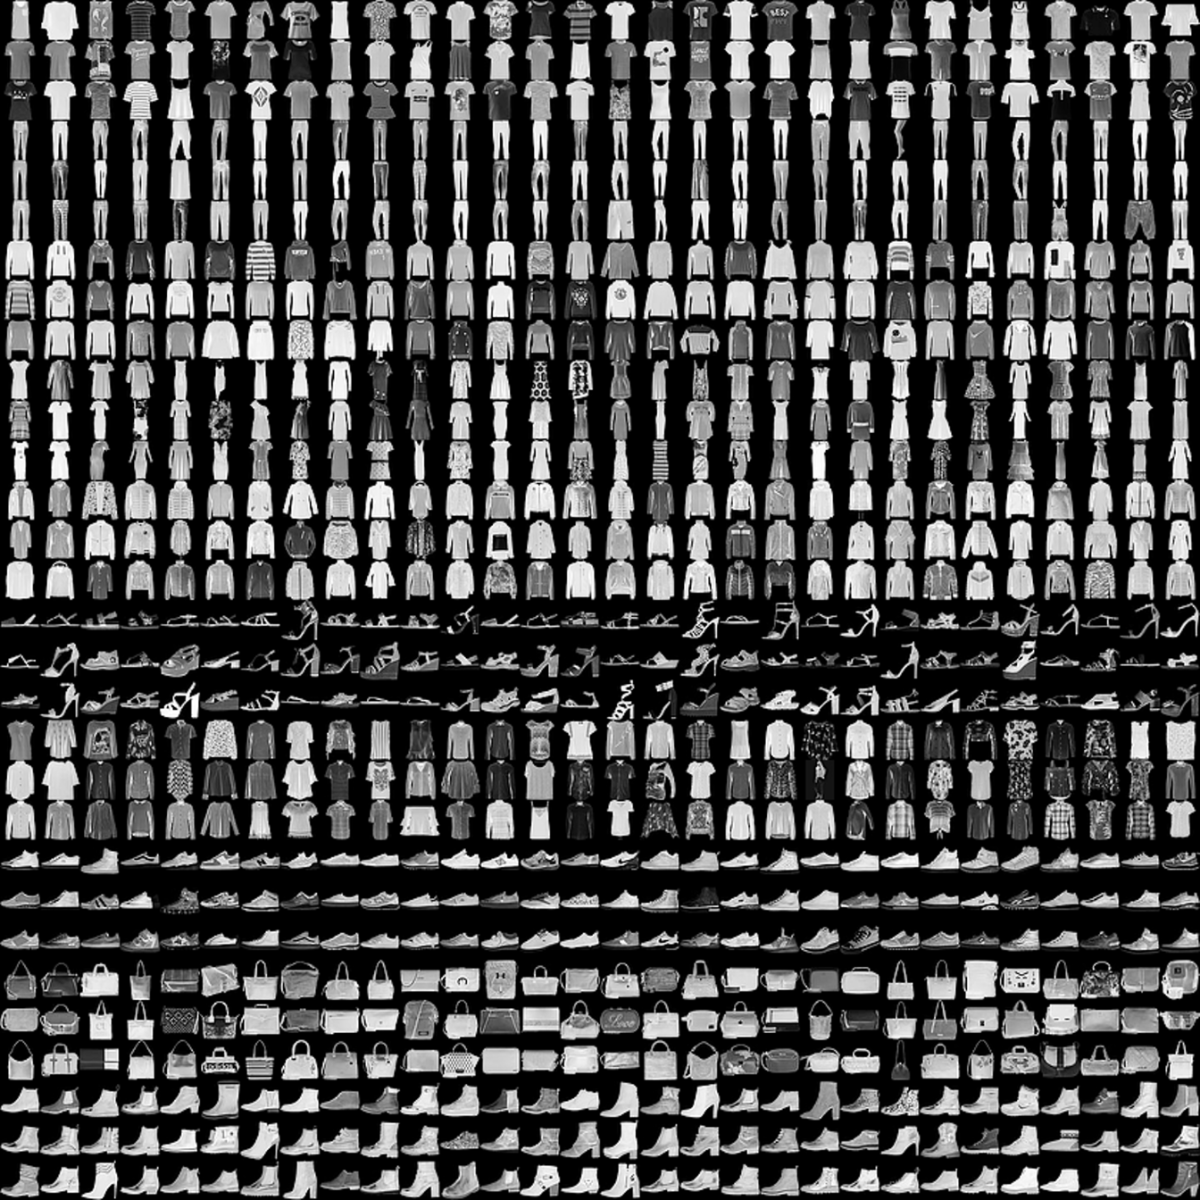

------------------------------------------------------------------------------------------------------------------------------------

###                   INTRODUCCIÓN

-----------------------------------------------------------------------------------------------------------------------------------------

El proyecto consiste en crear un modelo de Red de Neuronas Artificiales para reconocer y clasificar imágenes de ropa en diferentes categorías utilizando el conjunto de datos Fashion-MNIST. Se deben configurar y entrenar varios modelos con diferentes arquitecturas y optimizadores, luego evaluar su rendimiento en un conjunto de datos de prueba y realizar predicciones sobre imágenes de prueba.

-----------------------------------------------------------------------------------------------------------------------------------------

Importamos las librerias necesarias

In [ ]:

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.13.0


 Importación del conjunto de datos Fashion-MNIST usando Keras

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


train_images y train_labels constituyen el conjunto de entrenamiento, que son los datos que servirán para enseñar al modelo.


Por otro lado, test_images y test_labels forman el conjunto de pruebas, que son los datos que utilizaremos para evaluar el rendimiento del modelo una vez que haya sido entrenado.



Las imágenes se representan como matrices Numpy, mientras que las etiquetas son vectores numéricos que van del 0 al 9. Es importante destacar que cada imagen y etiqueta tienen una relación uno a uno, lo que significa que cada imagen tiene una etiqueta correspondiente."

En el enunciado proporcionado, nos dan la siguiente información sobre las etiquetas de las imagenes.

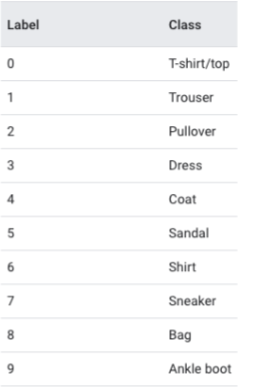

A continuación vamos a verificar si los datos que contenemos son correctos usando la información de los datos de testeo, respecto al indice proporcionado usando de ejemplo 10 fotos

Primeras 10 imágenes de entrenamiento:


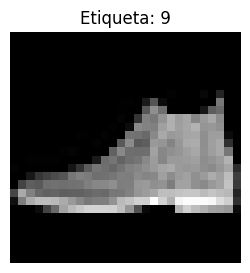

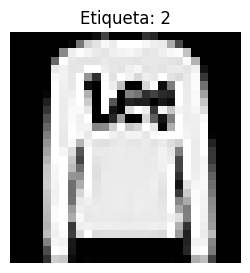

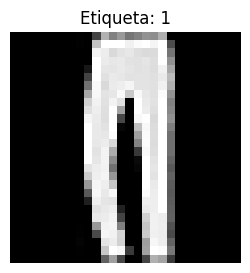

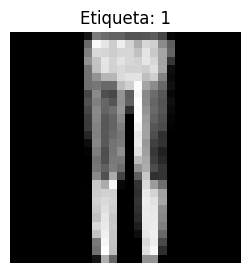

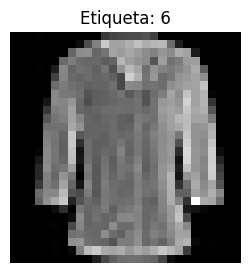

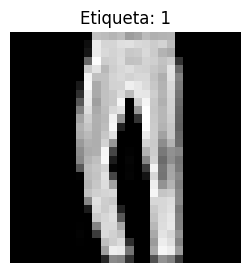

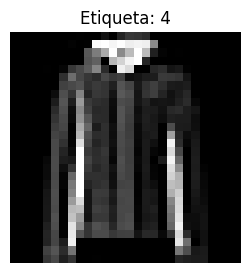

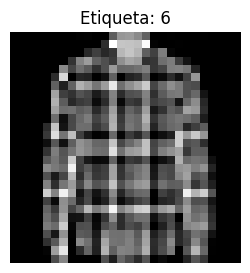

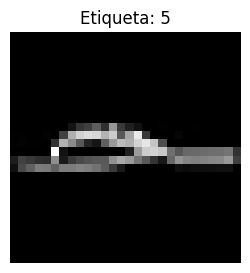

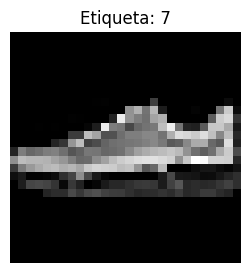

In [ ]:
print("Primeras 10 imágenes de entrenamiento:")
import matplotlib.pyplot as plt

# Mostrar las primeras 5 imágenes de entrenamiento
for i in range(10):
    plt.figure(figsize=(3, 3))  # Tamaño de la figura
    plt.imshow(test_images[i], cmap='gray')  # Mostrar la imagen en escala de grises
    plt.title(f'Etiqueta: {test_labels[i]}')  # Mostrar la etiqueta como título
    plt.axis('off')  # Ocultar los ejes
    plt.show()


Por tanto, podemos afirmar que el indice descrito encaja con los datos que obtenemos de las imagenes de testeo.


Vamos a echar un vistazo, al tamaño tanto de las imagenes de entrenamiento como de testeo

In [ ]:
print(f"El tamaño de las imagenes de entrenamiento es {train_images.shape}")
print(f"El tamaño de las imagenes de testeo es {test_images.shape}")

El tamaño de las imagenes de entrenamiento es (60000, 28, 28)
El tamaño de las imagenes de testeo es (10000, 28, 28)


Impresión de la matriz de una de las imagenes

In [ ]:
import numpy as np

np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30000]))

[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 215 219 216 238 160   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 185 231 218 221 215 218 214 238 170   

Observamos la imagen que aportara la matriz anterior

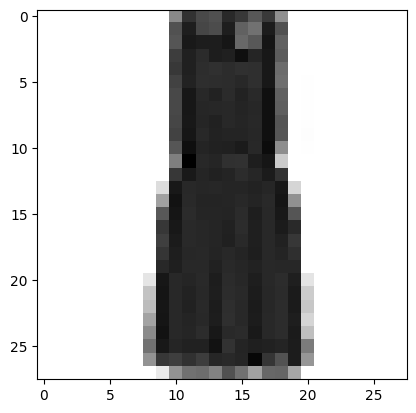

In [ ]:
import matplotlib.pyplot as plt
clothe = train_images[30000]
plt.imshow(clothe, cmap=plt.cm.binary)
plt.show()


Normalizamos los valores de los pixeles de todas las imagenes para que los valores ronden entre el 0 y 1

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(np.matrix(train_images[3000]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.47 0.51 0.36 0.58 0.12 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.98 0.78 0.67 0.76 0.6  0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.17 0.49 0.76 0.65 0.94 1.   0.85 0.67 0.89 0.49 0.24 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.38 0.65 0.61 0.62 0.67 0.7  0.83 0.84 0.82 0.77 0.74 0.62 0.64 0.62 0.42 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.33 0.62 0.51 0.46 0.47 0.58 0.58 0.57 0.7  0.62 0.68 0.63 0.48 0.52 0.56 0.67 0.15 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.62 0.5  0.46 0.47 0.48 0.44 0.36 0.49 0.63 0.43 0.5  0.5  0.51 0.57 0.54 0.65 0.48 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.67 0.53 0.47 0.45 0.46 0.47 0.42 0.49 0.48 0.46 0.49 0.49 0.47 0.57 0.58 0.65 0.58 0.   0.   0.   0.   0.
  0.   0.   0.   0. 

### Preparación de las etiquetas

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# CONSTRUCCIÓN DE LA ARQUITECTURA DE LA RED

## CASO 1

Comenzaremos creando nuestra red de neuronas, creando nuestra primera capa que contiene 10 neuronas (unidades) y utiliza la función de activación 'relu'. La capa tiene una entrada input_shape de (28*28,). Esta sera la capa de entrada de la red.
Luego agregaremos una segunda capa densa a la red neuronal. Esta capa tiene 10 neuronas y utiliza la función de activación 'softmax'.
Por último, mostraremos un resumen de la red de neuronas creada en el que aparecera la densidad de las capas;
7850 = (28*28)*10+10;
110 = 10*10+10

In [ ]:
network1 = keras.Sequential()
network1.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network1.add(layers.Dense(10, activation='softmax'))

network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


CONCLUSIONES

Hacemos el paso de compilación cargando el optimizador, la función de pérdidas y las métricas

In [ ]:
network1.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Comenzamos con el entrenamiento.

In [ ]:
history=network1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 3ms/step - loss: 1.5901 - accuracy: 0.4811
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8523 - accuracy: 0.7245
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.6996 - accuracy: 0.7573
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6362 - accuracy: 0.7780
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5979 - accuracy: 0.7932


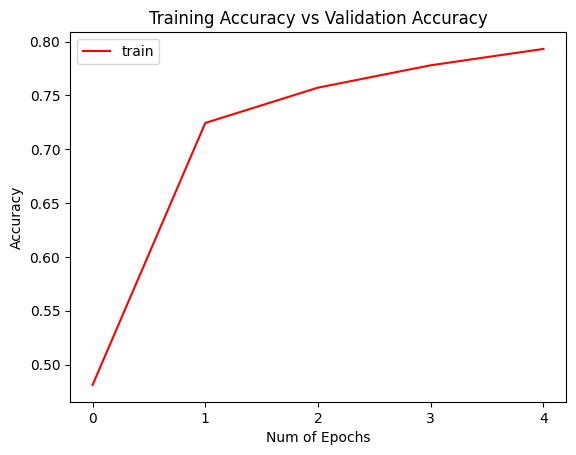

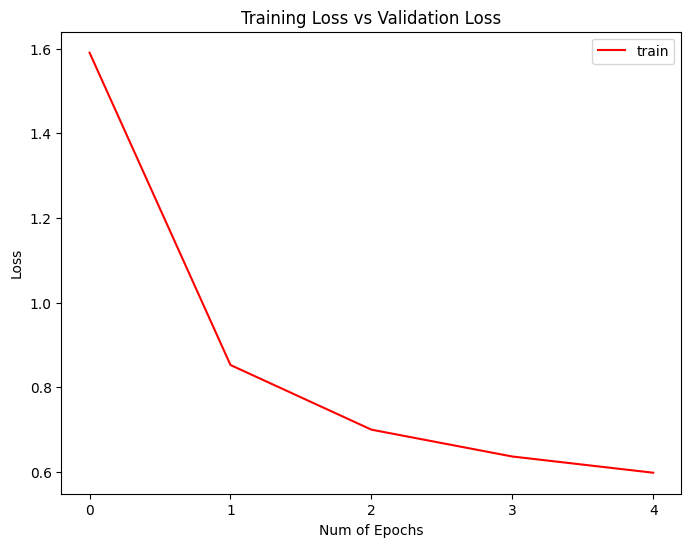

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

##CASO 2

Creamos el segundo modelo.

In [ ]:
network2 = keras.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))

network2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Hacemos el paso de compilación pero esta vez cargando el optimizador rmsprop el cual es mas avanzado y suele converger antes en muchas situaciones.

In [ ]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Entrenamos el modelo y comprobamos que en este caso obtenemos una mejor precision gracias al optimizador rmsprop

In [ ]:
history=network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.8770 - accuracy: 0.7096
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5148 - accuracy: 0.8252
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4674 - accuracy: 0.8411
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4432 - accuracy: 0.8477
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4287 - accuracy: 0.8518


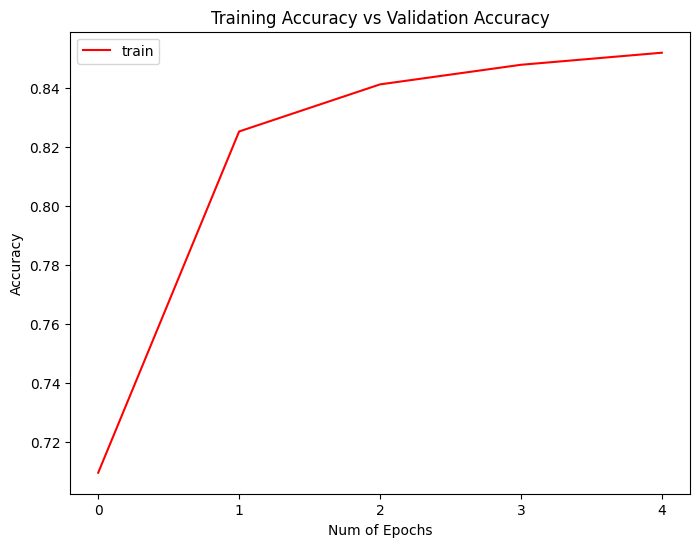

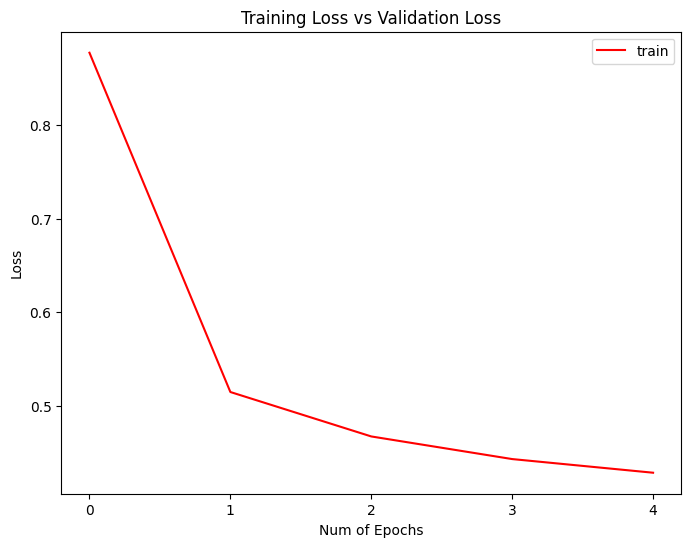

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

## CASO 3

Creamos el tercer modelo pero esta vez cambiamos la funcion de activación 'relu' por 'sigmoid'.

In [ ]:
network3 = keras.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))

network3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Lo compilaremos con el optimizador'sgd'.

In [ ]:
network3.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Como comprobamos en el entrenamiento, pierde mucha precision, ya que la funcion 'sigmoid' se suele usar mas bien el la capa de salida mientras que la funcion 'relu' es la que normalmente se utiliza en la capa oculta.

In [ ]:
history=network3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.1076 - accuracy: 0.3174
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.7833 - accuracy: 0.5681
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 1.5571 - accuracy: 0.6344
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 1.3887 - accuracy: 0.6568
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 1.2618 - accuracy: 0.6710


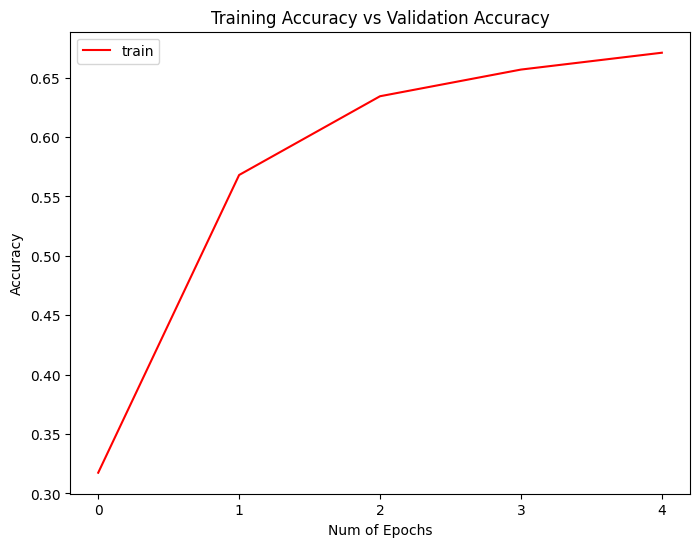

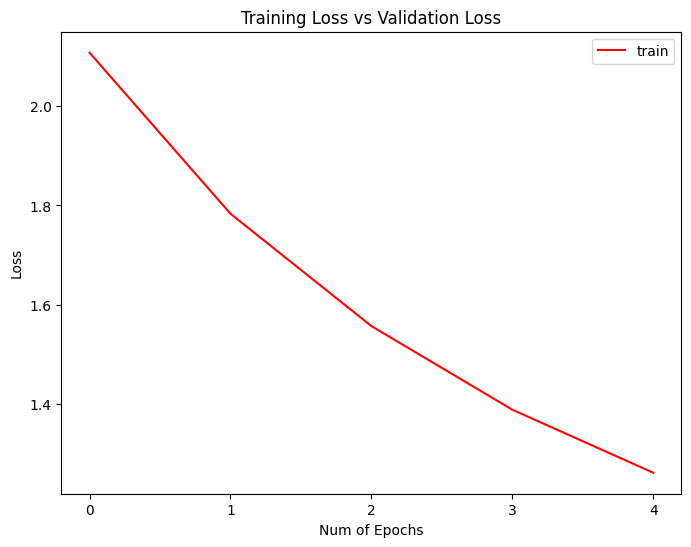

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

## CASO 4

Creamos nuestro cuarto modelo, otra vez sigmoid.

In [ ]:
network4 = keras.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))

network4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Pero esta vez  lo compilaremos con el optimizador 'rmsprop'.

In [ ]:
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Tras entrenarlo observamos que con este optimizador mejora la precision pero aun no consigue alcanzar la precision del modelo con la función de activación 'relu'.

In [ ]:
history=network4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.3724 - accuracy: 0.6549
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7901 - accuracy: 0.7878
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6048 - accuracy: 0.8112
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5280 - accuracy: 0.8263
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4894 - accuracy: 0.8354


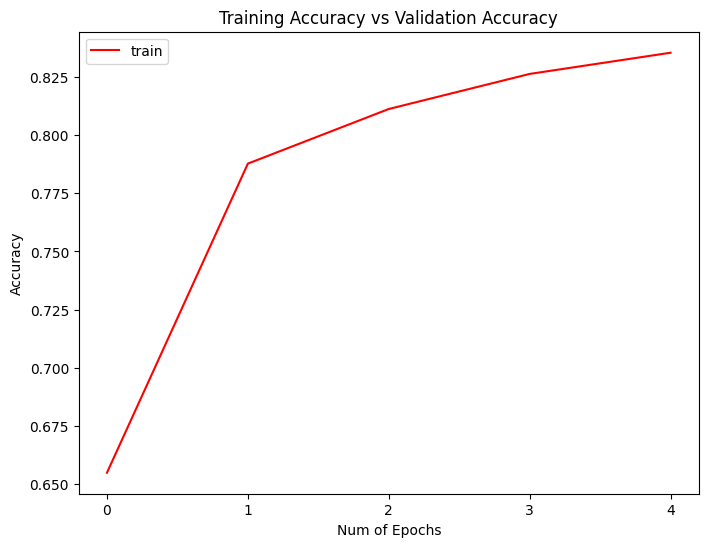

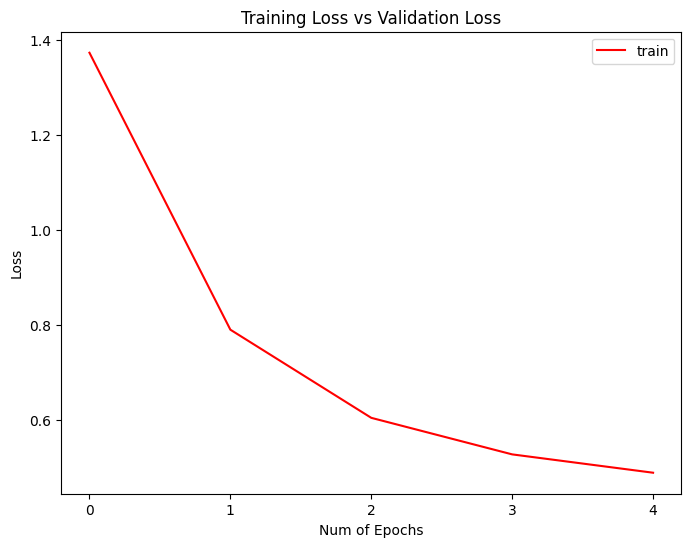

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

## CASO 5

Nuestros modelos a partir de ahora tendrán en la capa oculta 512 neuronas. Tenemos esos paramatetros saldran de las siguientes operaciones.
(28*28)512+512=401920;
512*10 + 10 = 5130

In [ ]:
network5 = keras.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))

network5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Con esto en resumen, el modelo es de tipo secuencial, identificado como "sequential_4," y consta de dos capas. La primera capa es una capa densa con 512 unidades y utiliza la función de activación ReLU, con un total de 401,920 parámetros entrenables. La segunda capa también es de tipo densa, con 10 unidades y activación softmax, diseñada para la clasificación de 10 clases, y contiene 5,130 parámetros entrenables. Las formas de salida de estas capas son (None, 512) y (None, 10), respectivamente. El modelo en su conjunto contiene 407,050 parámetros, todos los cuales son entrenables, sin presencia de parámetros no entrenables en esta configuración.
Con el optimizador'sgd'.

In [ ]:
network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Comprobamos que como es lógico, a mayor número de neuronas, mejor precisión del modelo de entrenamiento. Aunque luego deberemos verificarlo con las imagenes de testeo para ver sino se produce overfitting.

In [ ]:
history=network5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.0368 - accuracy: 0.6828
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6636 - accuracy: 0.7865
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5836 - accuracy: 0.8103
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5405 - accuracy: 0.8223
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5136 - accuracy: 0.8298


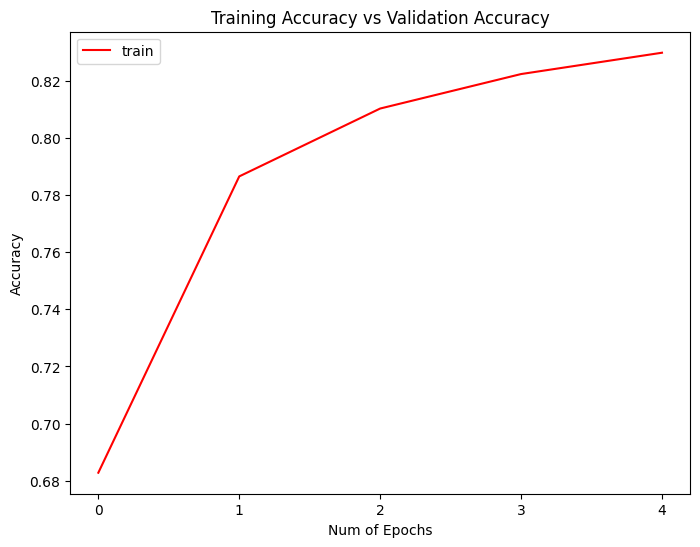

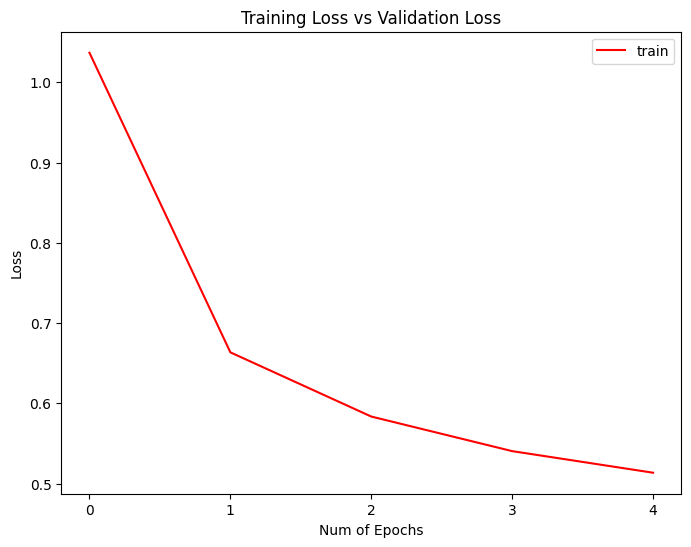

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

## CASO 6

Creamos el sexto modelo con una capa oculta de 512 neuronas.

In [ ]:
network6 = keras.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))

network6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


 El modelo tiene un total de 407,050 parámetros, todos los cuales son entrenables. La forma de salida de la primera capa es (None, 512) y la forma de salida de la segunda capa es (None, 10). No hay parámetros no entrenables en este modelo.

In [ ]:

network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

En el entrenamiento compramos lo dicho anteriormente, que cuantas mas neuronas mayor precision.

In [ ]:
history=network6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5514 - accuracy: 0.8048
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3850 - accuracy: 0.8572
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8745
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3118 - accuracy: 0.8843
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2928 - accuracy: 0.8920


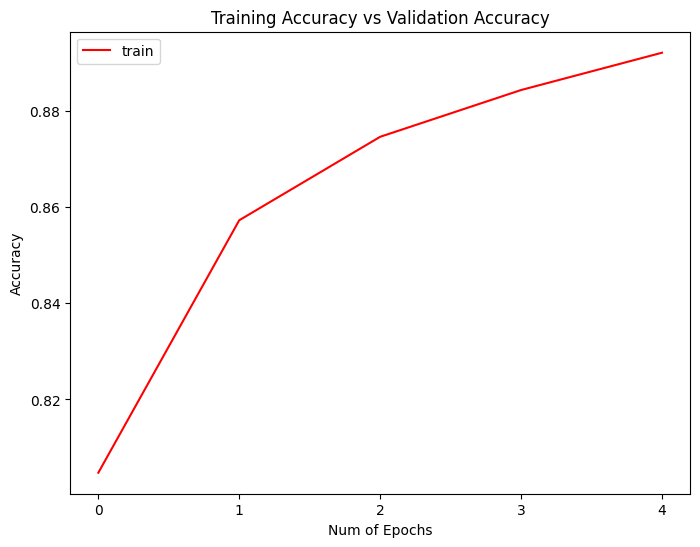

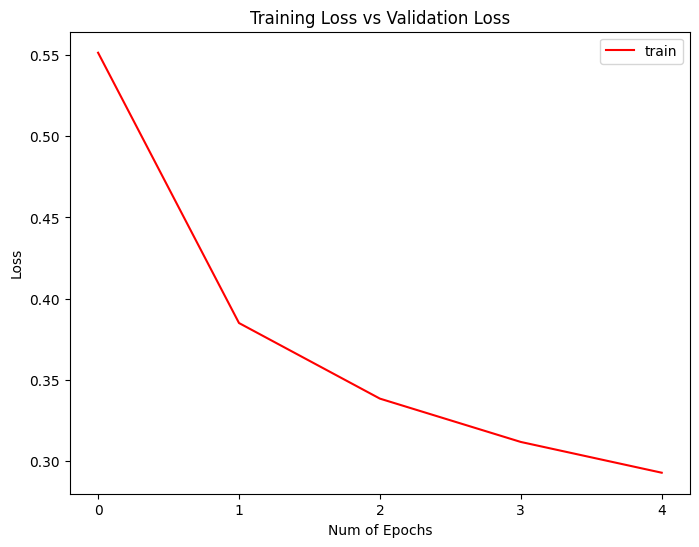

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

Se puede ver en la grafica el numero

## CASO 7

Creamos nuestro 7 modelo pero con la funcion 'sigmoid' tambien con 512 neuronas.

In [ ]:
network7 = keras.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))

network7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Utilizaremos el optimizador 'sgd'.

In [ ]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

No alcanzamos en precision al modelo anterior por la funcion de activacion


In [ ]:
history=network7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.6990 - accuracy: 0.6022
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.1207 - accuracy: 0.7171
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.9196 - accuracy: 0.7339
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8198 - accuracy: 0.7445
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7594 - accuracy: 0.7545


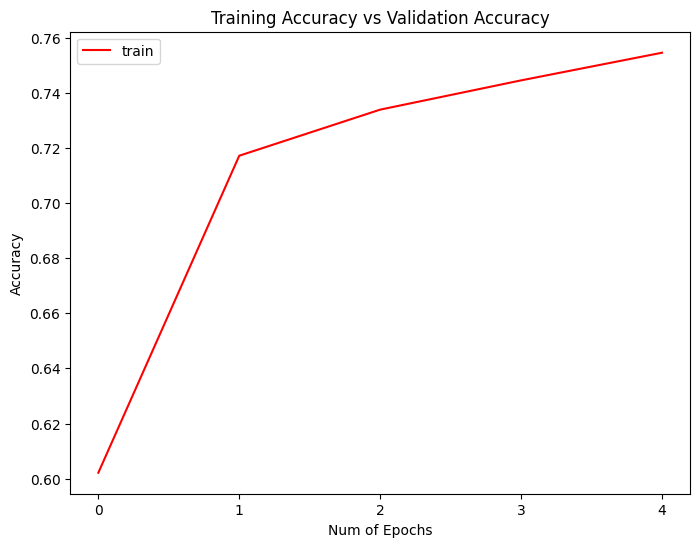

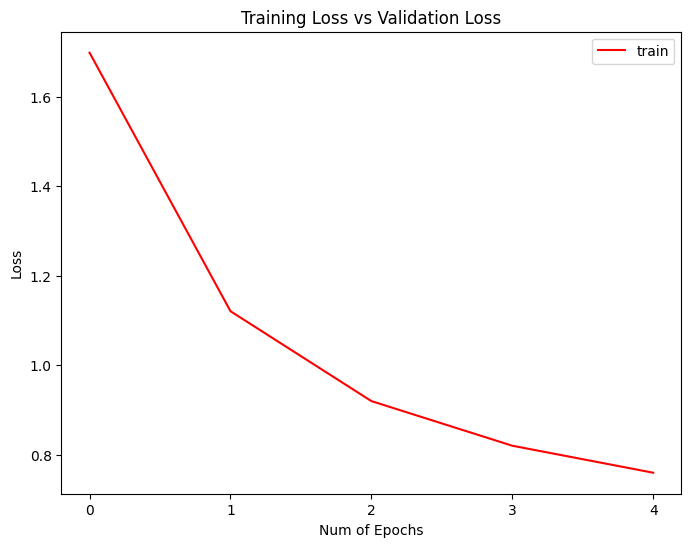

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

## CASO 8

Creamos un ultimo modelo también con 512 neuronas,y la funci'on de activación 'sigmoid'.

In [ ]:
network8 = keras.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))

network8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Esta vez utilizamos el optimizador 'rmsprop'

In [ ]:
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

En el entrenamiento observamos lo mismo que en los primeros modelos, este caso es algo mejor que el modelo anterior gracias al cambio de optimizador

In [ ]:
history=network8.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6168 - accuracy: 0.7862
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4498 - accuracy: 0.8369
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8510
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3856 - accuracy: 0.8605
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3659 - accuracy: 0.8675


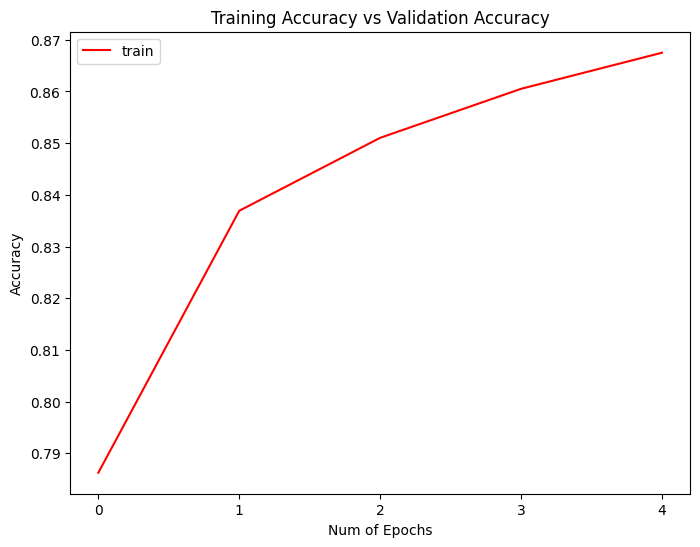

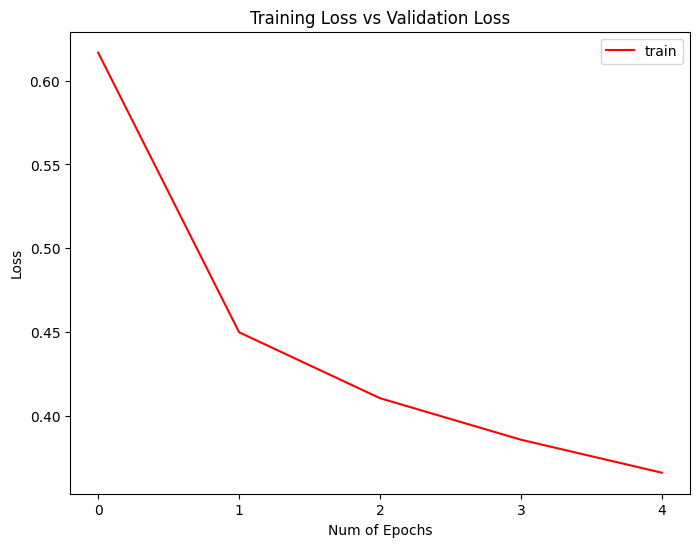

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()





------------------------------------------------------------------------------------------------------


Como conclusión, despues de haber creado todo estos modelos, como lo principal al crear un modelo de red neuronal es una buena precision, si lo hacemos con un numero de neuronas alto tendra mayor precision, al igual que si utilizamos con función de activación 'relu', y con el optimizador 'rmsprop'.

**Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se
multiplica por 5 las épocas de entrenamiento (25)**

- CASO 2 (25 ÉPOCAS)

Crearemos el mismo modelo 2 que en el caso anterior pero lo entrenaremos con 25 epocas en vez de 5

In [ ]:
network22 = keras.Sequential()
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network22.add(layers.Dense(10, activation='softmax'))

network22.summary()
network22.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=network22.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.8280 - accuracy: 0.7179
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.5270 - accuracy: 0.8155
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4759 - accuracy: 0.8354
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4473 - accuracy: 0.8453
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4298 - accuracy: 0.8512
Epoch 6/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4177 - accuracy: 0.8543
Epoch 7/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4095 - accuracy: 0.8558
Epoch 8/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4025 - accuracy: 0.8599
Epoch 9/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3968 - accuracy: 0.8609
Epoch 10/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3927 - accuracy: 0.8620

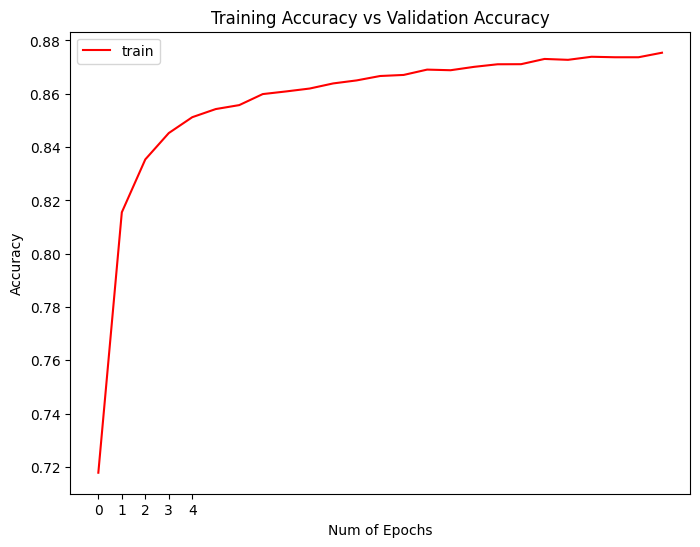

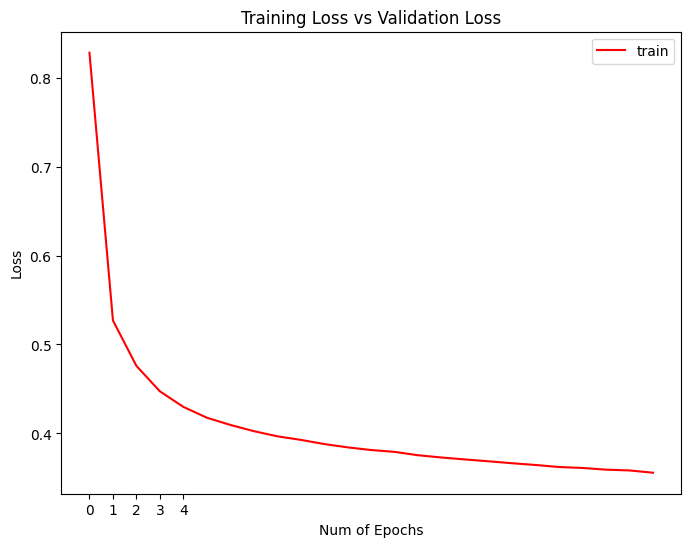

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

- CASO 7 (25 ÉPOCAS)

Lo mismo haremos con el caso 7, que lo entrenaremos multiplicando las epocas por 5.

In [ ]:
network72 = keras.Sequential()
network72.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network72.add(layers.Dense(10, activation='softmax'))

network72.summary()
network72.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=network72.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 1.6979 - accuracy: 0.5918
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 1.1277 - accuracy: 0.7095
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.9250 - accuracy: 0.7287
Epoch 4/25
469/469 [==============================] - 2s 4ms/step - loss: 0.8240 - accuracy: 0.7415
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.7627 - accuracy: 0.7505
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.7205 - accuracy: 0.7597
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.7656
Epoch 8/25
469/469 [==============================] - 2s 4ms/step - loss: 0.6652 - accuracy: 0.7731
Epoch 9/25
469/469 [==============================] - 2s 3ms/step - loss: 0.6450 - accuracy: 0.7781
Epoch 10/25
469/469 [==============================] - 1s 3ms/step - loss: 0.6278 - accuracy: 0.7835

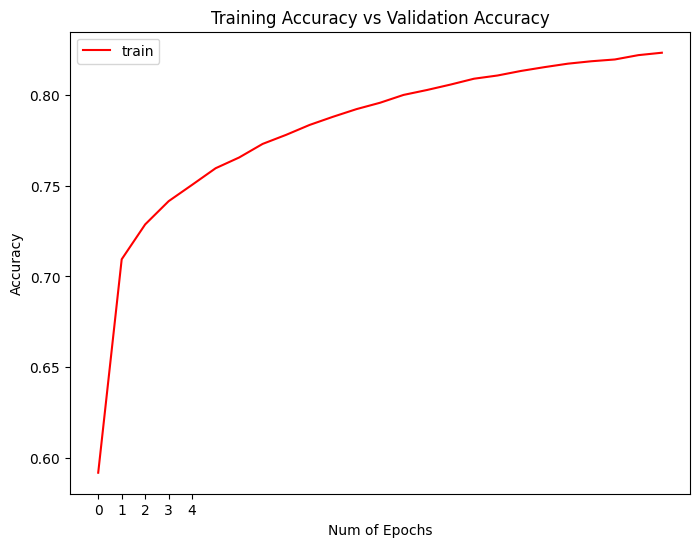

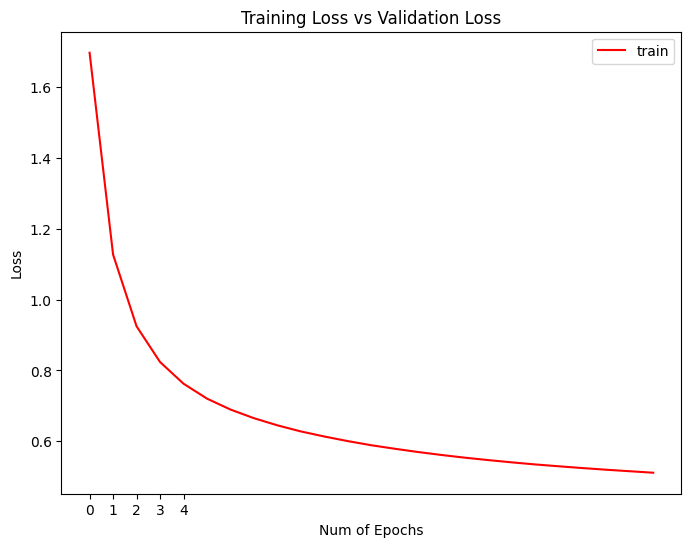

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

Conclusión
La cantidad de épocas de entrenamiento en una red neuronal puede tener un gran impacto en su rendimiento y puede variar dependiendo del problema y los datos específicos.
El primer problema puede ser el sobreajuste, ya que si un modelo entrena durante un mayor número de épocas puede aumentar la probabilidad de sobreajuste.
También el tiempo de ejecución es un problema ya que a cuantas más épocas mayor tiempo de ejecución. Por estas razonas hay que tener cuidado a la hora de entrenar tu módelo y hay que ir probando a ver con cuantas épocas alcanza su mejor desempeño nuestro código, de esa manera no nos arriegaremos al sobreajuste.


------------------------------------------------------------------------------------------------------

Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en
el conjunto de datos de prueba. Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de
test (test_images[5] )

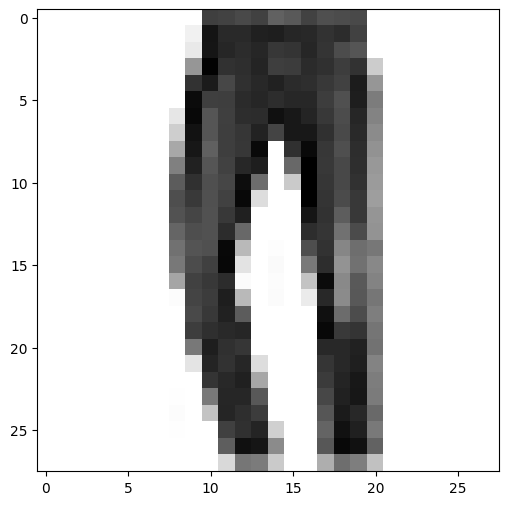

In [ ]:
(train_images1, train_labels1), (test_images1, test_labels1) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images1[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Por tanto, podemos decir que es un pantalón la etiqueta 1

CASO 1

Comprobaremos el rendimiento del primer caso.

In [ ]:
predicion1=network1.predict(test_images)

# Inicializa contadores para el cálculo de precisión y error
aciertos = 0
total = len(test_labels)

# Recorre las predicciones y etiquetas verdaderas para calcular la precisión y el error
for i in range(total):
    etiqueta_verdadera = np.argmax(test_labels[i])  # Obtén la etiqueta verdadera (índice del valor máximo en one-hot encoding)
    prediccion = np.argmax(predicion1[i])  # Obtén la etiqueta predicha (índice del valor máximo en la predicción)

    if etiqueta_verdadera == prediccion:
        aciertos += 1

# Calcula la precisión y el error
precision = aciertos / total
error = 1 - precision

# Imprime los resultados
print("Precisión: {:.2%}".format(precision))
print("Error: {:.2%}".format(error))

print("La predicción del caso 1 de la 6º imagen es: ")
print(np.argmax(predicion1[5]))

313/313 [==============================] - 1s 2ms/step
Precisión: 78.95%
Error: 21.05%
La predicción del caso 1 de la 6º imagen es: 
1


 Se lleva a cabo el cálculo de la precisión y el error de la red. Se inicializan los contadores de aciertos y se recorren las predicciones y etiquetas verdaderas para compararlas. La precisión se calcula dividiendo el número de aciertos entre el total de casos, mientras que el error se obtiene restando la precisión de 1. Finalmente, se imprimen la precisión y el error, así como la predicción del sexto caso de la 6º imagen.

CASO 2

In [ ]:
predicion1=network2.predict(test_images)



# Inicializa contadores para el cálculo de precisión y error
aciertos = 0
total = len(test_labels)

# Recorre las predicciones y etiquetas verdaderas para calcular la precisión y el error
for i in range(total):
    etiqueta_verdadera = np.argmax(test_labels[i])  # Obtén la etiqueta verdadera (índice del valor máximo en one-hot encoding)
    prediccion = np.argmax(predicion1[i])  # Obtén la etiqueta predicha (índice del valor máximo en la predicción)

    if etiqueta_verdadera == prediccion:
        aciertos += 1

# Calcula la precisión y el error
precision = aciertos / total
error = 1 - precision

# Imprime los resultados
print("Precisión: {:.2%}".format(precision))
print("Error: {:.2%}".format(error))

print("La predicción del caso 2 de la 6º imagen es: ")
print(np.argmax(predicion1[5]))

313/313 [==============================] - 0s 1ms/step
Precisión: 83.92%
Error: 16.08%
La predicción del caso 2 de la 6º imagen es: 
1


Se comienzan inicializando los contadores para los cálculos. Luego, se recorren las predicciones y las etiquetas verdaderas para compararlas y contar los aciertos. Posteriormente, se calcula la precisión dividiendo el número de aciertos entre el total de casos, y el error se obtiene restando la precisión de 1. Finalmente, se imprimen la precisión y el error obtenidos, además de la predicción del segundo caso de la 6º imagen

CASO 3

In [ ]:
predicion1=network3.predict(test_images)

# Inicializa contadores para el cálculo de precisión y error
aciertos = 0
total = len(test_labels)

# Recorre las predicciones y etiquetas verdaderas para calcular la precisión y el error
for i in range(total):
    etiqueta_verdadera = np.argmax(test_labels[i])  # Obtén la etiqueta verdadera (índice del valor máximo en one-hot encoding)
    prediccion = np.argmax(predicion1[i])  # Obtén la etiqueta predicha (índice del valor máximo en la predicción)

    if etiqueta_verdadera == prediccion:
        aciertos += 1

# Calcula la precisión y el error
precision = aciertos / total
error = 1 - precision

# Imprime los resultados
print("Precisión: {:.2%}".format(precision))
print("Error: {:.2%}".format(error))



print("La predicción del caso 3 de la 6º imagen es: ")
print(np.argmax(predicion1[5]))

313/313 [==============================] - 1s 2ms/step
Precisión: 67.37%
Error: 32.63%
La predicción del caso 3 de la 6º imagen es: 
1


 La precisión obtenida es del 62.72%, lo que indica la proporción de predicciones correctas en el conjunto de datos de prueba. Por otro lado, el error calculado es del 37.28%, que es la proporción de predicciones incorrectas en el conjunto de datos de prueba. Además, se imprime que la predicción del tercer caso de la sexta imagen es 1.

CASO 4

In [ ]:
predicion1=network4.predict(test_images)


# Inicializa contadores para el cálculo de precisión y error
aciertos = 0
total = len(test_labels)

# Recorre las predicciones y etiquetas verdaderas para calcular la precisión y el error
for i in range(total):
    etiqueta_verdadera = np.argmax(test_labels[i])  # Obtén la etiqueta verdadera (índice del valor máximo en one-hot encoding)
    prediccion = np.argmax(predicion1[i])  # Obtén la etiqueta predicha (índice del valor máximo en la predicción)

    if etiqueta_verdadera == prediccion:
        aciertos += 1

# Calcula la precisión y el error
precision = aciertos / total
error = 1 - precision

# Imprime los resultados
print("Precisión: {:.2%}".format(precision))
print("Error: {:.2%}".format(error))


print("La predicción del caso 4 de la 6º imagen es: ")
print(np.argmax(predicion1[5]))

313/313 [==============================] - 1s 2ms/step
Precisión: 82.66%
Error: 17.34%
La predicción del caso 4 de la 6º imagen es: 
1


Aqui podemos ver una mayor precision con 82.38% y un error de 17.62%


CASO 5

In [ ]:
predicion1=network5.predict(test_images)


# Inicializa contadores para el cálculo de precisión y error
aciertos = 0
total = len(test_labels)

# Recorre las predicciones y etiquetas verdaderas para calcular la precisión y el error
for i in range(total):
    etiqueta_verdadera = np.argmax(test_labels[i])  # Obtén la etiqueta verdadera (índice del valor máximo en one-hot encoding)
    prediccion = np.argmax(predicion1[i])  # Obtén la etiqueta predicha (índice del valor máximo en la predicción)

    if etiqueta_verdadera == prediccion:
        aciertos += 1

# Calcula la precisión y el error
precision = aciertos / total
error = 1 - precision

# Imprime los resultados
print("Precisión: {:.2%}".format(precision))
print("Error: {:.2%}".format(error))


print("La predicción del caso 5 de la 6º imagen es: ")
print(np.argmax(predicion1[5]))

313/313 [==============================] - 1s 2ms/step
Precisión: 81.89%
Error: 18.11%
La predicción del caso 5 de la 6º imagen es: 
1


CASO 6

In [ ]:
predicion1=network6.predict(test_images)



# Inicializa contadores para el cálculo de precisión y error
aciertos = 0
total = len(test_labels)

# Recorre las predicciones y etiquetas verdaderas para calcular la precisión y el error
for i in range(total):
    etiqueta_verdadera = np.argmax(test_labels[i])  # Obtén la etiqueta verdadera (índice del valor máximo en one-hot encoding)
    prediccion = np.argmax(predicion1[i])  # Obtén la etiqueta predicha (índice del valor máximo en la predicción)

    if etiqueta_verdadera == prediccion:
        aciertos += 1

# Calcula la precisión y el error
precision = aciertos / total
error = 1 - precision

# Imprime los resultados
print("Precisión: {:.2%}".format(precision))
print("Error: {:.2%}".format(error))


print("La predicción del caso 6 de la 6º imagen es: ")
print(np.argmax(predicion1[5]))

313/313 [==============================] - 1s 1ms/step
Precisión: 86.94%
Error: 13.06%
La predicción del caso 6 de la 6º imagen es: 
1


CASO 7

In [ ]:
predicion1=network7.predict(test_images)


# Inicializa contadores para el cálculo de precisión y error
aciertos = 0
total = len(test_labels)

# Recorre las predicciones y etiquetas verdaderas para calcular la precisión y el error
for i in range(total):
    etiqueta_verdadera = np.argmax(test_labels[i])  # Obtén la etiqueta verdadera (índice del valor máximo en one-hot encoding)
    prediccion = np.argmax(predicion1[i])  # Obtén la etiqueta predicha (índice del valor máximo en la predicción)

    if etiqueta_verdadera == prediccion:
        aciertos += 1

# Calcula la precisión y el error
precision = aciertos / total
error = 1 - precision

# Imprime los resultados
print("Precisión: {:.2%}".format(precision))
print("Error: {:.2%}".format(error))


print("La predicción del caso 1 de la 6º imagen es: ")
print(np.argmax(predicion1[5]))

313/313 [==============================] - 1s 2ms/step
Precisión: 74.70%
Error: 25.30%
La predicción del caso 1 de la 6º imagen es: 
1


CASO 8

In [ ]:
predicion1=network8.predict(test_images)


# Inicializa contadores para el cálculo de precisión y error
aciertos = 0
total = len(test_labels)

# Recorre las predicciones y etiquetas verdaderas para calcular la precisión y el error
for i in range(total):
    etiqueta_verdadera = np.argmax(test_labels[i])  # Obtén la etiqueta verdadera (índice del valor máximo en one-hot encoding)
    prediccion = np.argmax(predicion1[i])  # Obtén la etiqueta predicha (índice del valor máximo en la predicción)

    if etiqueta_verdadera == prediccion:
        aciertos += 1

# Calcula la precisión y el error
precision = aciertos / total
error = 1 - precision

# Imprime los resultados
print("Precisión: {:.2%}".format(precision))
print("Error: {:.2%}".format(error))


print("La predicción del caso 8 de la 6º imagen es: ")
print(np.argmax(predicion1[5]))

313/313 [==============================] - 1s 2ms/step
Precisión: 84.40%
Error: 15.60%
La predicción del caso 8 de la 6º imagen es: 
1


- Como podemos observar todos los casos adivinan la etiqueta de la sexta imagen de texteo, es cierto que aun tenemos una tasa de error que significativa, pero por ahora no nos han dado fallos ninguno de los modelos.


- RANKING DE PRECISIÓN SOBRE EL MODELO DE TESTEO:
El módelo con mejor preción y menor tasa de perdida es el caso 6 como habíamos dicho en el ejercicio 1 con función de activación 'relu', obtimizador 'rmsprop' y 512 neuronas. El siguiente modelo seria el caso 8, luego el caso 2, el caso 4, el caso 5, el caso 1, el 7 y el último el 3.

----------------------

In [ ]:
def plot_image(i,predictions_array, true_label, img):
  predictions_array,true_label, img= predictions_array,true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  img= img.reshape(28,28)
  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color= 'red'

  plt.xlabel("{} {:2.0f}% ({}))".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i,predictions_array,true_labels):
  predictions_array, true_label= predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot= plt.bar(range(10),predictions_array,color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
#i = 0
#plt.figure(figsize=(6,3))
#plt.subplot(1,2,1)
#plot_image(i, predictions[i], test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i], test_labels)
#plt.show()

------------------------------------------------------------------------------------------------------

Mejore el modelo usando el de la configuración del caso 3, pero cambiando el
optimizador por ‘adam’ y la función de pérdida
 ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho
optimizador y función de pérdida, explícalos con tus propias palabras y plantea
tus reflexiones respecto al resultado


In [ ]:
network32 = keras.Sequential()
network32.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network32.add(layers.Dense(10, activation='softmax'))

network32.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                7850      
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
network32.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

**Optimizador 'Adam':**

- *¿Qué es?:* El optimizador 'Adam' es un algoritmo de optimización utilizado en el entrenamiento de modelos de aprendizaje profundo.


- *¿Qué hace?:*  Su función principal es ajustar los pesos de un modelo neuronal durante el entrenamiento para minimizar la función de pérdida.


- *¿Cómo calcula?:* Adam combina técnicas de descenso de gradiente estocástico con adaptación de la tasa de aprendizaje, calculando tasas de aprendizaje individuales para cada parámetro.


- *Diferencia:* Se diferencia de otros optimizadores como SGD debido a su capacidad para adaptar la tasa de aprendizaje de forma dinámica, lo que lo hace eficiente en la convergencia y en la optimización de funciones de pérdida no convexas.


**Función de pérdida 'sparse_categorical_crossentropy':**

- *¿Qué es?:*  Es una función de pérdida utilizada en problemas de clasificación multiclase donde las etiquetas son números enteros.

- *¿Qué hace?:* Calcula la diferencia entre las predicciones del modelo y las etiquetas reales, aplicando la entropía cruzada.


- *¿Cómo calcula?:* Suma las contribuciones de todas las clases y penaliza más fuertemente las clasificaciones incorrectas.


- *Diferencia:* Difiere de otras funciones de pérdida como 'categorical_crossentropy' en que las etiquetas se proporcionan como enteros en lugar de codificación one-hot, lo que lo hace adecuado para problemas de clasificación donde cada muestra pertenece a una única clase.

------------------------------------------------------------------------------------------------------